<a href="https://colab.research.google.com/github/poomshift/WebUI-Forge-Colab-Alchemist/blob/main/WebUI_Forge_Colab_Alchemist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

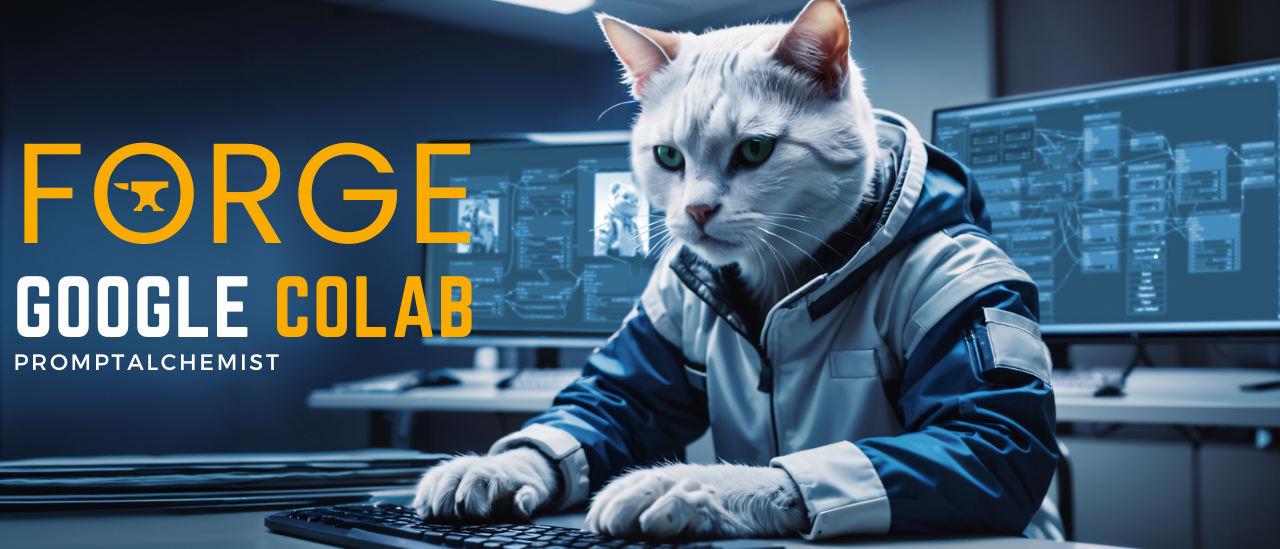

📢 พื้นที่ประกาศกิจกรรม

> Generative AI for Graphic Design รุ่นที่ 6 จัดโดย Skooldio

> วันที่ 30 พฤศจิกายน 2024  [>>สนใจคลิก<<](https://www.skooldio.com/workshops/ai-art-graphic-design)

##Prompt Alchemist’s WebUI Forge Colab
📢 พบปัญหาการใช้งาน กรุณาแจ้งมาที่ [Facebook/promptalchemist](https://www.facebook.com/PromptAlchemist)


📝 สมัคร Google Colab Pro [คลิกที่นี่](https://colab.research.google.com/signup)

>ราคา 343฿ ต่อเดือน ได้รับ 100 computing units

>การใช้งานประมาณ 1.67 units/hr = ชั่วโมงละ 5.7฿

📃 คู่มือการใช้งานอย่างละเอียด - work in progress..

📹 วีดีโอสอนการใช้งาน - work in progress..

ไฟล์ภาพจะถูกเซฟไว้ที่ Google Drive MyDrive/Forge_output

**ถ้าต้องการใช้ LoRA และ Chackpoint จาก Google Drive ให้สร้างโฟเดอร์**

>"**Lora**" , "**Checkpoint**"

บรรยาย In-house สนใจติดต่อ [Facebook/promptalchemist](https://www.facebook.com/PromptAlchemist)

In [ ]:
#@markdown #1. Install WebUI Forge | Models (2-3 นาที)

from IPython.display import clear_output
from IPython.display import Javascript
import ipywidgets as widgets
from google.colab import drive
import os
from google.colab import output
import subprocess
import sys


output.enable_custom_widget_manager()

display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))
def inf(msg, style, wdth): inf = widgets.Button(description=msg, disabled=True, button_style=style, layout=widgets.Layout(min_width=wdth));display(inf)

%cd /content
drive.mount('/content/drive')



#ติดตั้ง WebUI Forge
!git clone https://github.com/lllyasviel/stable-diffusion-webui-forge

#ติดตั้ง Dependencies
%cd /content/stable-diffusion-webui-forge
!apt -y install -qq aria2
!pip install xformers!=0.0.18 torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu121
# !pip install -r requirements_versions.txt

def install_requirements(requirements_file):
    # Install packages without asking for restart
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', '-q', '-r', requirements_file])

# Usage
install_requirements('requirements_versions.txt')

#Extension
!git clone https://github.com/zanllp/sd-webui-infinite-image-browsing /content/stable-diffusion-webui-forge/extensions/sd-webui-infinite-image-browsing
!git clone https://github.com/Coyote-A/ultimate-upscale-for-automatic1111 /content/stable-diffusion-webui-forge/extensions/ultimateSD
# !git clone https://github.com/BlafKing/sd-civitai-browser-plus /content/stable-diffusion-webui-forge/extensions/sd-civitai-browser-plus
!git clone https://github.com/Gourieff/sd-webui-reactor /content/stable-diffusion-webui-forge/extensions/sd-webui-reactor

%cd /content/stable-diffusion-webui-forge/extensions/sd-webui-infinite-image-browsing
!pip install -r requirements.txt

%cd /content/stable-diffusion-webui-forge/extensions/sd-webui-reactor
!pip install -r requirements.txt


%cd /content/stable-diffusion-webui-forge

# Define the file path and content
file_path = '/content/stable-diffusion-webui-forge/config.json'
config_content = '''
{
  "outdir_samples": "",
  "outdir_txt2img_samples": "/content/drive/MyDrive/Forge_output/text",
  "outdir_img2img_samples": "/content/drive/MyDrive/Forge_output/image",
  "outdir_extras_samples": "/content/drive/MyDrive/Forge_output/extras",
  "outdir_grids": "",
  "outdir_txt2img_grids": "/content/drive/MyDrive/Forge_output/grids",
  "outdir_img2img_grids": "/content/drive/MyDrive/Forge_output/grids",
  "outdir_save": "/content/drive/MyDrive/Forge_output/save",
  "outdir_init_images": "/content/drive/MyDrive/Forge_output/init-images"
}
'''
# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Write the config file
with open(file_path, 'w') as config_file:
    config_file.write(config_content)

!mkdir -p /content/stable-diffusion-webui-forge/models/ControlNet
!mkdir -p /content/stable-diffusion-webui-forge/models/Lora

#ESRGAN
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/embed/upscale/resolve/main/4x-UltraSharp.pth -d /content/stable-diffusion-webui-forge/models/ESRGAN -o 4x-UltraSharp.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/uwg/upscaler/resolve/main/ESRGAN/8x_NMKD-Superscale_150000_G.pth -d /content/stable-diffusion-webui-forge/models/ESRGAN -o 8x_NMKD-Superscale_150000_G.pth

#Flux VAE, Clip
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/black-forest-labs/FLUX.1-schnell/resolve/main/ae.safetensors -d /content/stable-diffusion-webui-forge/models/VAE -o ae.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/comfyanonymous/flux_text_encoders/resolve/main/clip_l.safetensors -d /content/stable-diffusion-webui-forge/models/text_encoder -o clip_l.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/comfyanonymous/flux_text_encoders/resolve/main/t5xxl_fp8_e4m3fn.safetensors -d /content/stable-diffusion-webui-forge/models/text_encoder -o t5xxl_fp8_e4m3fn.safetensors

#@markdown Flux1Dev
shuttle_3_diffusion_Q4_gguf_4_steps = True # @param {type:"boolean"}
if shuttle_3_diffusion_Q4_gguf_4_steps == True:
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/shuttleai/shuttle-3-diffusion-GGUF/resolve/main/shuttle-3-diffusion-Q4_K_S.gguf -d /content/stable-diffusion-webui-forge/models/Stable-diffusion -o shuttle-3-diffusion-Q4_K_S.gguf
else:
  ()

Flux1_Dev_Fp8 = False # @param {type:"boolean"}
if Flux1_Dev_Fp8 == True:
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/Kijai/flux-fp8/resolve/main/flux1-dev-fp8.safetensors -d /content/stable-diffusion-webui-forge/models/Stable-diffusion -o flux1-dev-fp8.safetensors
else:
  ()

#@markdown SDXL
PonyDiffusionV6XL = False # @param {type:"boolean"}
if PonyDiffusionV6XL == True:
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/Magamanny/Pony-Diffusion-V6-XL/resolve/main/ponyDiffusionV6XL_v6StartWithThisOne.safetensors -d /content/stable-diffusion-webui-forge/models/Stable-diffusion -o ponyDiffusionV6XL.safetensors
else:
  ()

Juggernaut_XL = True # @param {type:"boolean"}
if Juggernaut_XL == True:
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://civitai.com/api/download/models/782002 -d /content/stable-diffusion-webui-forge/models/Stable-diffusion -o Juggernaut_XL.safetensors
else:
  ()

#@markdown SD 1.5
majicMIX_realistic_V7 = False # @param {type:"boolean"}
if majicMIX_realistic_V7 == True:
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://civitai.com/api/download/models/176425 -d /content/stable-diffusion-webui-forge/models/Stable-diffusion -o majicmixRealisticV7.safetensors
else:
  ()


#@markdown Controlnets and Ip-adapter
SD15_Controlnets_and_Ip_adapter = False # @param {type:"boolean"}
if SD15_Controlnets_and_Ip_adapter == True:
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11f1p_sd15_depth_fp16.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v11p_sd15_depth_fp16.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_canny_fp16.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v11p_sd15_canny_fp16.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_inpaint_fp16.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v11p_sd15_inpaint_fp16.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_lineart_fp16.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v11p_sd15_lineart_fp16.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_mlsd_fp16.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v11p_sd15_mlsd_fp16.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_normalbae_fp16.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v11p_sd15_normalbae_fp16.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_openpose_fp16.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v11p_sd15_openpose_fp16.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_scribble_fp16.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v11p_sd15_scribble_fp16.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_seg_fp16.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v11p_sd15_seg_fp16.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_softedge_fp16.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v11p_sd15_softedge_fp16.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15s2_lineart_anime_fp16.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v11p_sd15s2_lineart_anime_fp16.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/monster-labs/control_v1p_sd15_qrcode_monster/resolve/main/control_v1p_sd15_qrcode_monster.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v1p_sd15_qrcode_monster.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/monster-labs/control_v1p_sd15_qrcode_monster/resolve/main/control_v1p_sd15_qrcode_monster.yaml -d /content/stable-diffusion-webui-forge/models/ControlNet -o control_v1p_sd15_qrcode_monster.yaml
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/h94/IP-Adapter/resolve/main/models/ip-adapter-plus_sd15.bin -d /content/stable-diffusion-webui-forge/models/ControlNet -o ip-adapter-plus_sd15.pth

else:
  ()

SDXL_Controlnets_and_Ip_adapter = False # @param {type:"boolean"}
if SDXL_Controlnets_and_Ip_adapter == True:
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/xinsir/controlnet-canny-sdxl-1.0/resolve/main/diffusion_pytorch_model_V2.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o controlnet-canny-sdxl.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/xinsir/controlnet-depth-sdxl-1.0/resolve/main/diffusion_pytorch_model.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o controlnet-depth-sdxl.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/xinsir/controlnet-openpose-sdxl-1.0/resolve/main/diffusion_pytorch_model.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o controlnet-openpose-sdxl.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/xinsir/controlnet-scribble-sdxl-1.0/resolve/main/diffusion_pytorch_model.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o controlnet-scribble-sdxl.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/bdsqlsz/qinglong_controlnet-lllite/resolve/main/bdsqlsz_controlllite_xl_mlsd_V2.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o controlllite_xl_mlsd.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/h94/IP-Adapter/resolve/main/sdxl_models/ip-adapter-plus_sdxl_vit-h.safetensors -d /content/stable-diffusion-webui-forge/models/ControlNet -o ip-adapter-plus_sdxl_vit-h.safetensors

else:
  ()

!cp -av /content/drive/MyDrive/Lora/* /content/stable-diffusion-webui-forge/models/Lora
!cp -av /content/drive/MyDrive/Checkpoint/* /content/stable-diffusion-webui-forge/models/Stable-diffusion

# #cloudflare tunnel
# !wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
# !dpkg -i cloudflared-linux-amd64.deb

inf('\u2714 Complete','success', '50px')

In [ ]:
#@markdown #2. Run WebUI Forge
%cd /content/stable-diffusion-webui-forge
import subprocess
import threading
import time
import socket
from IPython.display import clear_output
from IPython.display import Javascript
import ipywidgets as widgets

# Set up display
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))


# Launch WebUI with Gradio share
!python launch.py --listen --share --port 7860 --api